# Pymaceuticals Analysis

Using the data provided in the csv files, by manipulating the data in dataframes we can make a few observations and inferences:
    -Of four drug regimens used in the testing, we can see that the max tumor sizes and even the minimum tumor sizes was greater in the use of Infubinol and Ceftamin than Capomulin and Ramicane. There was only one identified potential outlier for Infubinol but the other three didn't seem to have any potentials for messing with the data.
    -As we can notice in the line chart and in the data for one specific test mouse, we can observe a trend with one of the drug regimen, that the tumor volume would increase for a short period but overall drop lower, and then it would continue this trend until the last time point of around 40-45 days. We can observe that there seemed to be a positive outcome as the tumor sized decreased and was lower than the initial starting volume.
    -Finally, in the last scatter plot and linear regression model, we can observe a very close positive correlation between the mouse's weight and its tumor volume size. It appears that the heavier the mouse, the greater volume tumor it would have, at least this is the case with the capomulin regimen.

# Prepare the Data

In [44]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#Paths to files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/study_results.csv"

#Read csv files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
#Print columns to see what to merge on
print(mouse_metadata.columns)
print(study_results.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [4]:
#Combine into single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'left')
#Display data preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
#Count number of mice
mouse_study['Mouse ID'].nunique()

249

In [6]:
#Find duplicate mouse ID
duplicate = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
#Get all data for duplicate mouse ID
duplicated_data = mouse_study.loc[(mouse_study['Mouse ID'] == 'g989')]
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
#Drop duplicates
mouse_study.drop(mouse_study.index[mouse_study['Mouse ID']=='g989'], inplace = True)

In [9]:
#Recheck the mouse count
mouse_study['Mouse ID'].nunique()

248

# Summary Statistics

In [10]:
#Mean tumor volume by drug regimen
avg_tumor_size = mouse_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

#Median tumor volume
median_tumor_size = mouse_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

#Variance
var_tumor_size = mouse_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

#Standard Deviation
stdv_tumor_size = mouse_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

#Standard error of the mean
sem_tumor_size = mouse_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [11]:
summary_data = {'mean': avg_tumor_size,
                'median': median_tumor_size,
                'var': var_tumor_size,
                'std': stdv_tumor_size,
                'sem': sem_tumor_size
               }

summary_statistics_df = pd.DataFrame(summary_data)
summary_statistics_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Create Bar and Pie Charts

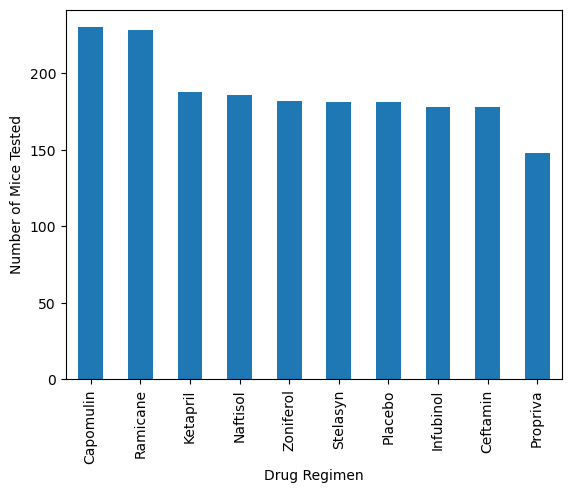

In [12]:
#Create two identical bar chart showing total number of timepoints for all mice tested for each drug regimen

#First method: using pandas
mice_tested = mouse_study['Drug Regimen'].value_counts()

mice_tested.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation = 90)
plt.show()

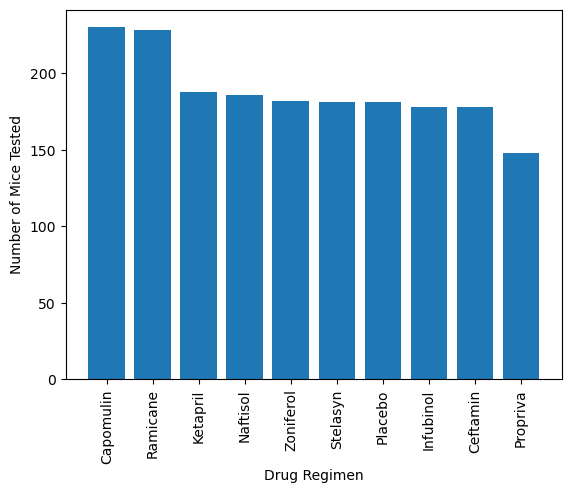

In [13]:
#2nd Method: using matplotlib

x_axis = mice_tested.index.values
y_axis = mice_tested.values
plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation = 90)
plt.show()

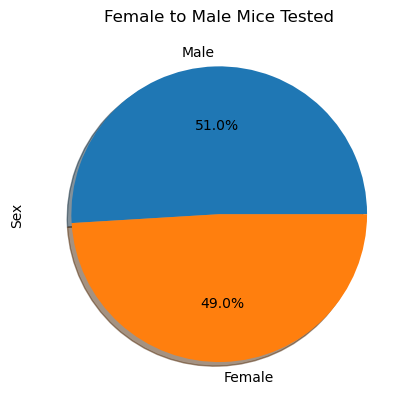

In [14]:
#Create two identical pie charts for female vs male mice

#1st method: using pandas
female_to_male = mouse_study['Sex'].value_counts()

female_to_male.plot.pie(y = 'Sex',
                        title = 'Female to Male Mice Tested',
                        legend = False,
                        autopct = '%1.1f%%',
                        shadow= True)
plt.show()

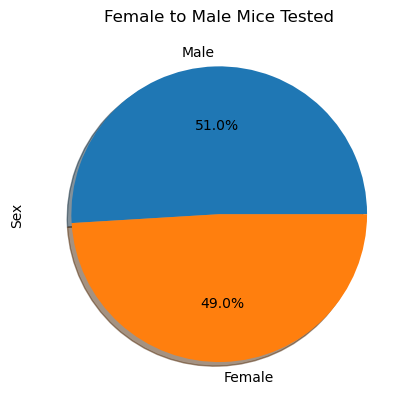

In [15]:
#2nd method: using matplotlib
labels = 'Male', 'Female'
plt.pie(female_to_male, labels = labels, shadow = True, autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.title('Female to Male Mice Tested')
plt.show()

In [16]:
#Identify last timepoints for each mouse id
last_timepoint = mouse_study.groupby('Mouse ID').max()['Timepoint']
last_timepoint_df = pd.DataFrame(last_timepoint).reset_index()

#Merge this data with the original dataframe
merged_df = pd.merge(last_timepoint_df, mouse_study, on = ('Mouse ID', 'Timepoint'), how= 'left')
merged_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [17]:
#Create list of treatments to loop through
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

#For loop through all the treatments to find quartiles, iqr and potential outliers
for drug in treatments:
    
    last_timepoint = merged_df.loc[merged_df['Drug Regimen']== drug, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(last_timepoint)
    
    quartiles = last_timepoint.quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    iqr = upperquartile - lowerquartile
    lowerbound = lowerquartile - (1.5*iqr)
    upperbound = upperquartile + (1.5*iqr)
    
    outliers = last_timepoint.loc[(last_timepoint < lowerbound) | (last_timepoint > upperbound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


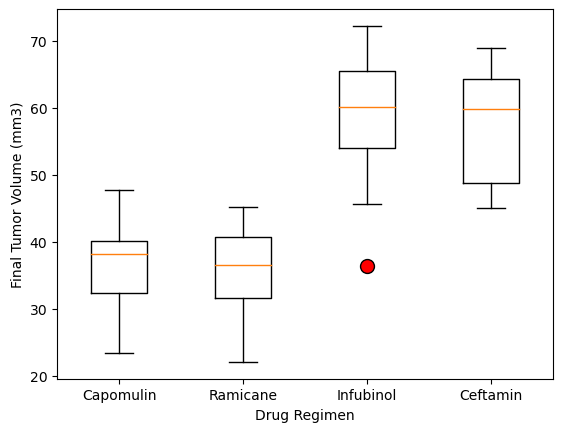

In [18]:
#Plot box and whisker
fig1, tumor_vol_plot = plt.subplots()
tumor_vol_plot.boxplot(tumor_vol_data, labels=treatments, flierprops = {'markerfacecolor': 'r', 'markersize': 10})
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

In [19]:
#Grab data for one mouse id under the capomulin regimen
mouse_l509 = mouse_study[(mouse_study['Mouse ID'] == 'l509')]
mouse_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


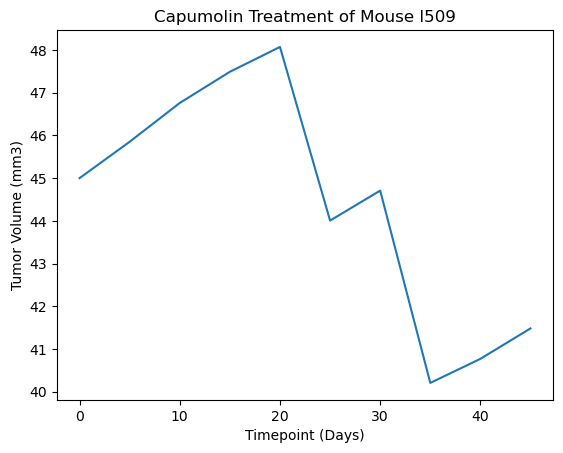

In [20]:
#Plot line chart for the tumor volume over the time  of the treatment
x_axis = mouse_l509['Timepoint']
y_axis = mouse_l509['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capumolin Treatment of Mouse l509')
plt.show()

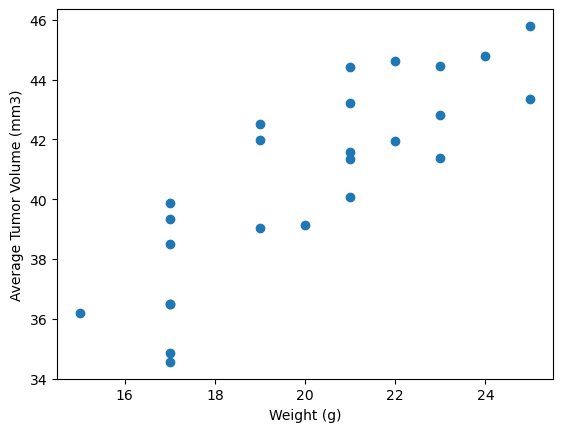

In [40]:
#Seperate data for test subjects under the capomulin regimen
capomulin_df = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']
capomulin_grouped = capomulin_df.groupby('Mouse ID').mean()

#Plot the weight compared with the tumor volume
avg_weight = capomulin_grouped['Weight (g)']
avg_tumor = capomulin_grouped['Tumor Volume (mm3)']

plt.scatter(avg_weight, avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.close()

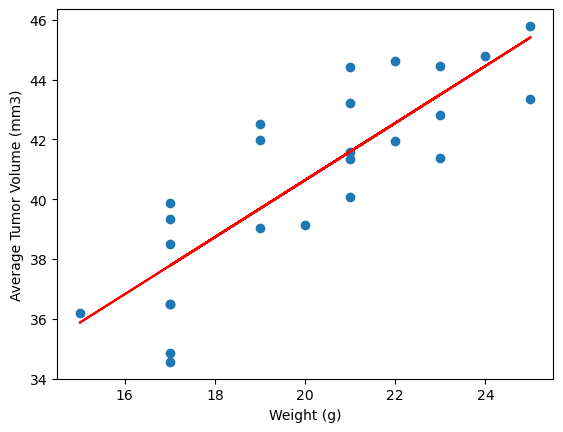

In [49]:
#Create linear regression model to show correlation between the two variables
x_values = capomulin_grouped['Weight (g)']
y_values = capomulin_grouped['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [48]:
#print results for the correlation
corr = capomulin_grouped['Weight (g)'].corr(capomulin_grouped['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr, 2)}")

The correlation between mouse weight and the average tumor volume is 0.84
